In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
working_directory=os.getcwd()
print(working_directory)

/Users/jiayiwang/Documents/Data_Career/Python/Python projects (data from Kaggle)/Medical Cost Personal Datasets


In [27]:
path=working_directory + '/insurance.csv'

In [28]:
df=pd.read_csv(path)

Data Infor

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Null values

In [31]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Sex

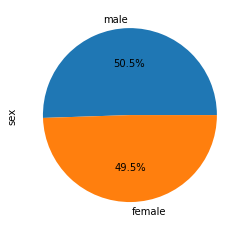

In [32]:
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [33]:
data = df.groupby("sex").sum()
data

,age,bmi,children,charges
sex,,,,
female,26151,20110.070,711,8.321061e+06
male,26308,20917.555,754,9.434764e+06


Region

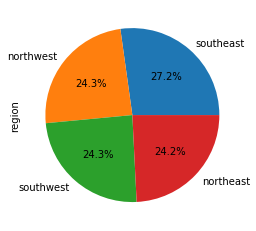

In [34]:
df['region'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Smoker

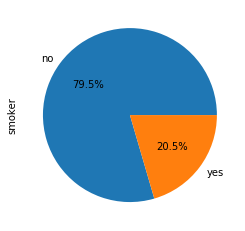

In [35]:
df['smoker'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Correlation

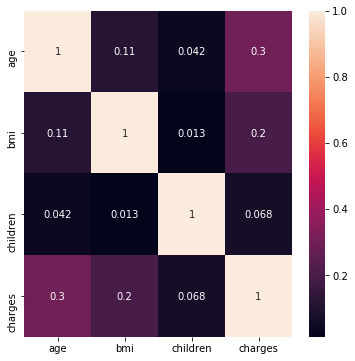

In [20]:
df_cor=df[['age','bmi','children','charges']]
df_cor.corr()
plt.figure(figsize=(6,6))
fig=sns.heatmap(data=df_cor.corr(),annot=True)
plt.show()

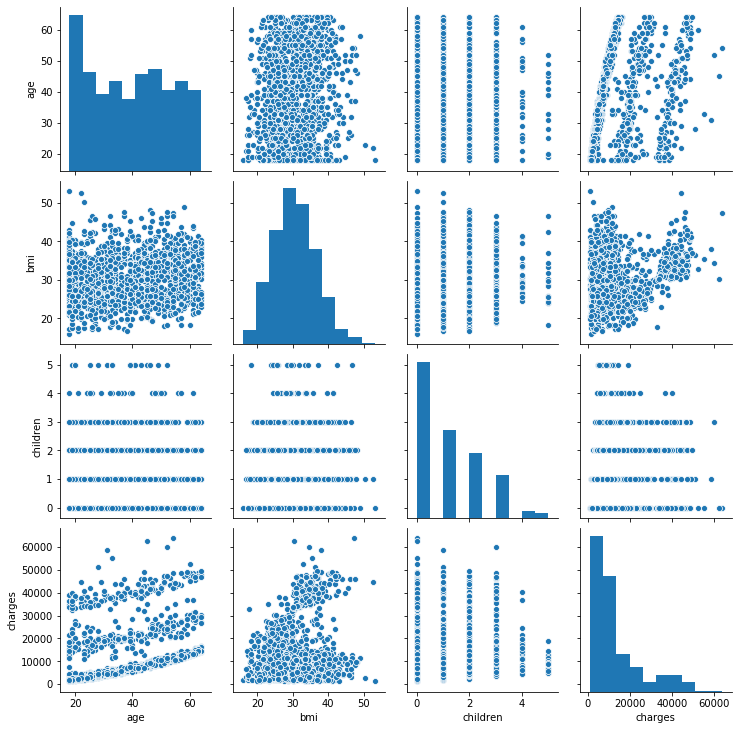

In [23]:
sns.pairplot(df)

Age vs Charges

Text(0.5, 1.0, 'Age vs Charges (sex)')

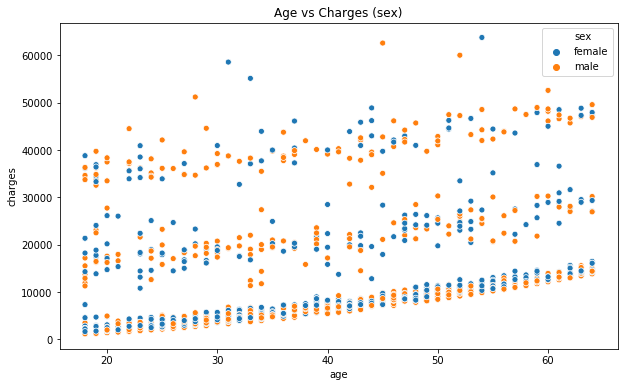

In [44]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=df, x="age", y="charges",hue='sex')
ax.set_title('Age vs Charges (sex)')

Text(0.5, 1.0, 'Age vs Charges (region)')

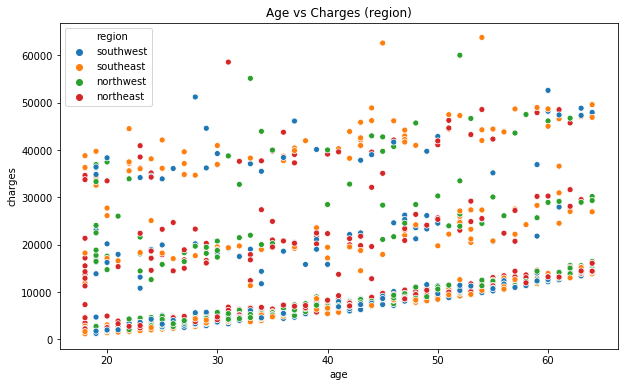

In [47]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=df, x="age", y="charges",hue='region')
ax.set_title('Age vs Charges (region)')

Text(0.5, 1.0, 'Age vs Charges (smoker)')

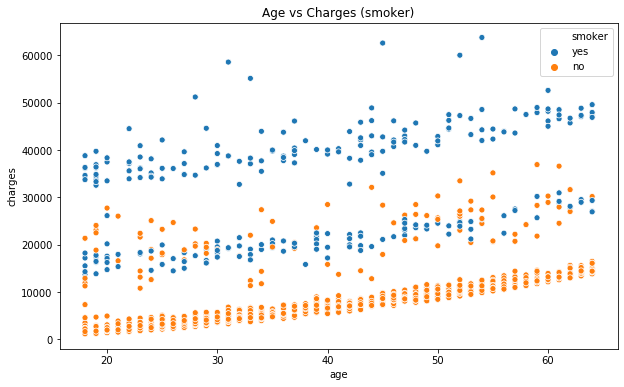

In [49]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=df, x="age", y="charges",hue='smoker')
ax.set_title('Age vs Charges (smoker)')

BMI

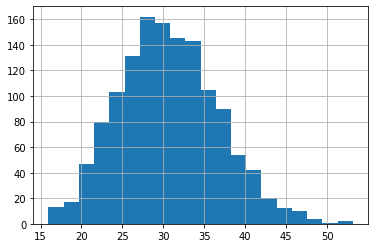

In [50]:
df['bmi'].hist(bins=20)

Children vs Charges

Text(0.5, 1.0, 'Children vs Charges')

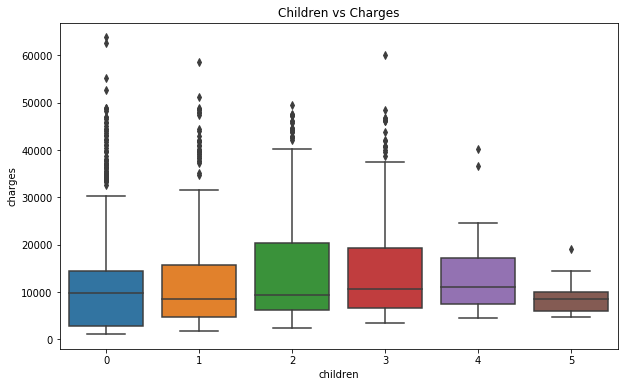

In [51]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(data=df,x='children',y='charges')
ax.set_title('Children vs Charges')

Text(0.5, 1.0, 'Sex vs Smoker')

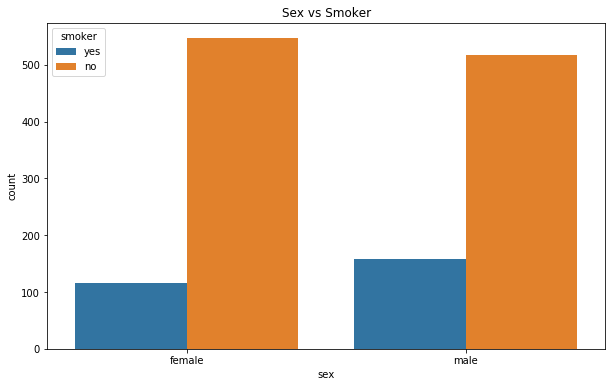

In [53]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x='sex',hue='smoker')
ax.set_title('Sex vs Smoker')

Change sex, smoker, region from categorical to numeric

In [57]:
df['sex']=df['sex'].map({'male':0, 'female':1})
df['smoker']=df['smoker'].map({'yes':0, 'no':1})
df['region']=df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [59]:
X=df.drop('charges',axis=1)
y=df['charges']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 78.33463107364535


Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
RandomForestRegressorScore = rf.score(X_test, y_test)
print("Accuracy obtained by Random Forest Regressor model:",RandomForestRegressorScore*100)

Accuracy obtained by Random Forest Regressor model: 86.68499951155684


Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [69]:
DecisionTreeRegressorScore = tree.score(X_test, y_test)
print("Accuracy obtained by Decision Tree Regressor model:",DecisionTreeRegressorScore*100)

Accuracy obtained by Decision Tree Regressor model: 73.34243140049531


Model comparison

Text(0, 0.5, 'Model Accuracy')

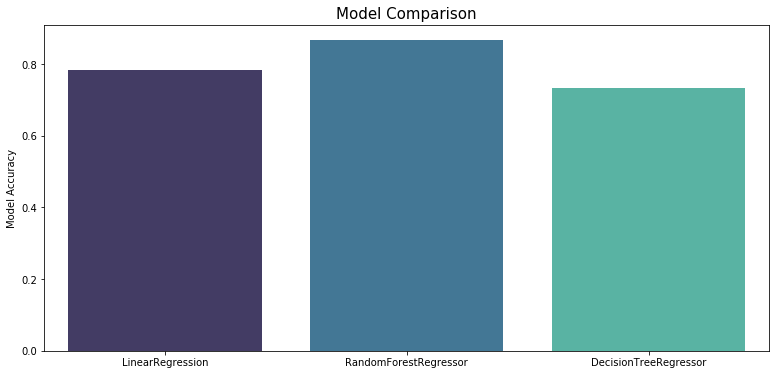

In [77]:
plt.figure(figsize=(13,6))
x=['LinearRegression','RandomForestRegressor','DecisionTreeRegressor']
y=[LinearRegressionScore,RandomForestRegressorScore,DecisionTreeRegressorScore]
ax=sns.barplot(x=x,y=y,palette='mako')
ax.set_title('Model Comparison',fontsize=15)
plt.ylabel('Model Accuracy')